In [2]:
import matplotlib as mpl
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import plotly.express as px 
import plotly

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
act = pd.read_csv('/content/gdrive/Shareddrives/dacom_yz/2_act_info.csv')
cus = pd.read_csv('/content/gdrive/Shareddrives/dacom_yz/2_cus_info.csv')
iem = pd.read_csv('/content/gdrive/Shareddrives/dacom_yz/2_iem_info.csv')
trd_kr = pd.read_csv('/content/gdrive/Shareddrives/dacom_yz/2_trd_kr.csv')
trd_oss = pd.read_csv('/content/gdrive/Shareddrives/dacom_yz/2_trd_oss.csv')
#data_schema_vf.xlsx

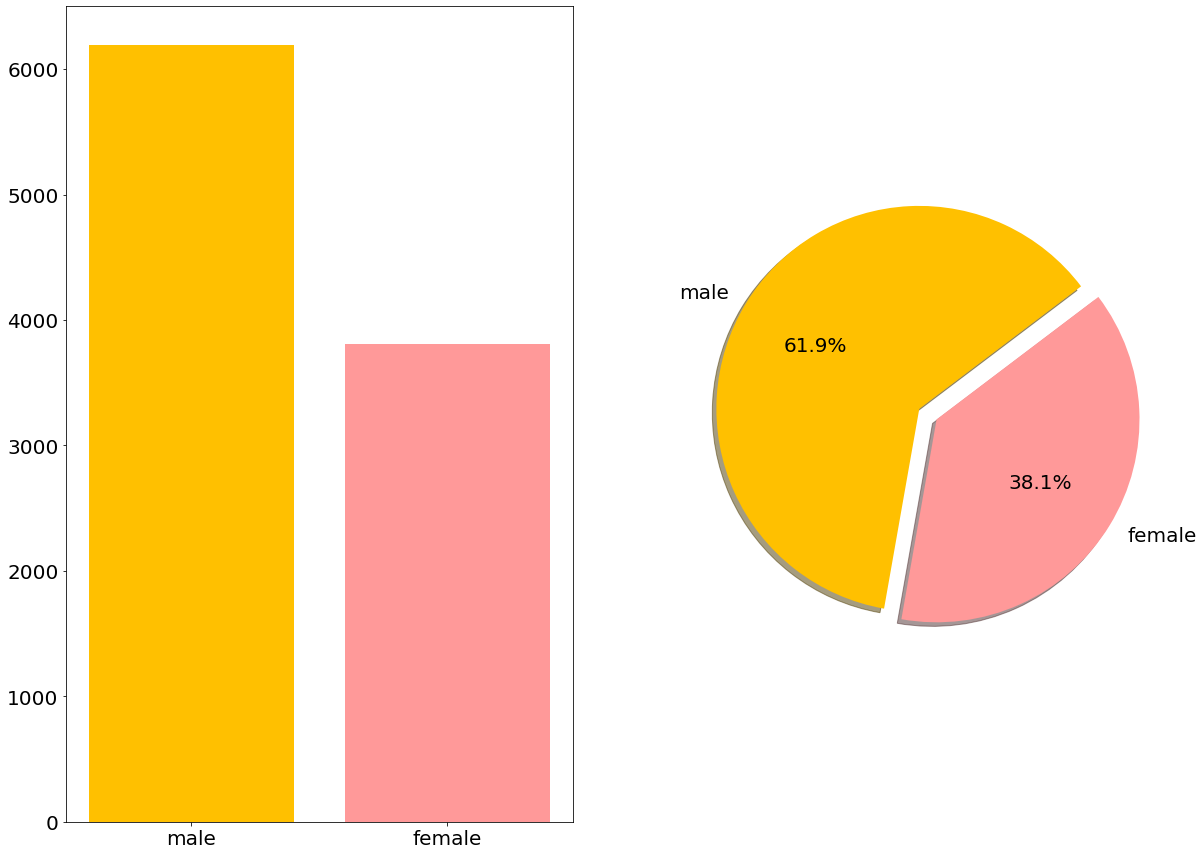

In [6]:
# 1남성 / 2여성
sex_counts = cus['sex_dit_cd'].value_counts()

explode = [0.05, 0.05]
#colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
colors = ['#ffc000', '#ff9999']


fig, ax = plt.subplots(1,2,figsize=(20,15))


ax[0].bar(['male', 'female'],[sex_counts[1], sex_counts[2]], color = colors)
ax[1].pie([sex_counts[1], sex_counts[2]], labels=['male', 'female'], autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors) #textprops={'fontsize': 25}


#plt.scatter(['male', 'female'], [sex_counts[1], sex_counts[2]], marker= 'o', s=400, color= 'red', alpha=0.5)
plt.rcParams.update({'font.size': 20})

plt.show()

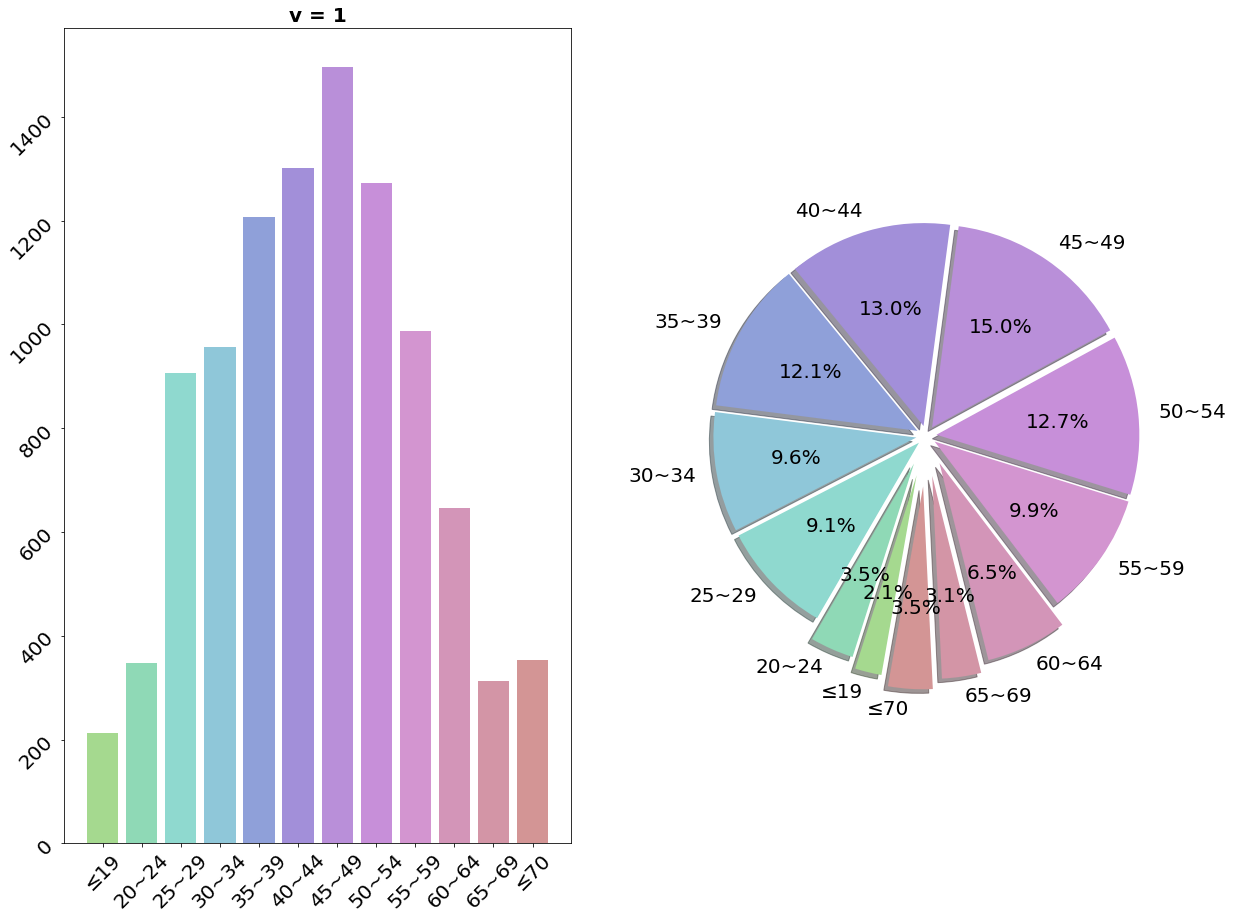

In [14]:
p = cus['cus_age'].value_counts()
p.sort_index(inplace=True)

explode = [0.2, 0.15, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.15, 0.2, 0.25]
#colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
ages = ['≤19', '20~24', '25~29', '30~34', '35~39', '40~44', '45~49', '50~54', '55~59', '60~64', '65~69', '≤70']
colors = ['#a5d98f', '#8fd9b6', '#8fd9cf', '#8fc7d9', '#8fa0d9', '#a28fd9', '#b98fd9', '#c78fd9', '#d395d0', '#d395b8', '#d395a6', '#d39595']


fig, ax = plt.subplots(1, 2,figsize=(20,15))



ax[0].bar(ages,[p[i] for i in [0,20,25,30,35,40,45,50,55,60,65,70]], color = colors)
ax[1].pie([p[i] for i in [0,20,25,30,35,40,45,50,55,60,65,70]], labels = ages, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors) #textprops={'fontsize': 10}

plt.rcParams.update({'font.size': 20})

ax[0].tick_params(labelrotation=45)
ax[0].set_title('v = 1',fontweight="bold", size=20)

plt.show()


<h1><span style="background-color:yellow;">--------------------------------12-23 이후------------------------------- </span></h1>

한글 컬럼

In [7]:
act.columns = ['계좌번호', '고객번호', '계좌개설월']
cus.columns = ['고객번호', '성별', '연령대', '주소(시도)', '고객등급', '고객투자성향']
iem.columns = ['종목코드', '종목영문명', '종목한글명']
trd_kr.columns = ['계좌번호','주문날짜','주문순서','주문접수시간대','최종체결시간대','종목코드','매매구분코드','체결수량','체결가격','주문매체구분코드']
trd_oss.columns = ['계좌번호','주문날짜','주문순서','주문접수시간대','최종체결시간대','종목코드','매매구분코드','체결수량','체결가격','주문매체구분코드','거래통화코드','거래통화환율']

In [8]:
yz20 = cus['연령대'] == 20
yz25 = cus['연령대'] == 25
yz30 = cus['연령대'] == 30
yz35 = cus['연령대'] == 35

cus_yz = cus.loc[cus['연령대'].index[yz20 | yz25 | yz30 | yz35]]
cus_y = cus.loc[cus['연령대'].index[yz20 | yz25]]
cus_z = cus.loc[cus['연령대'].index[yz30 | yz35]]

In [9]:
sex_counts_yz = cus_yz['성별'].value_counts()

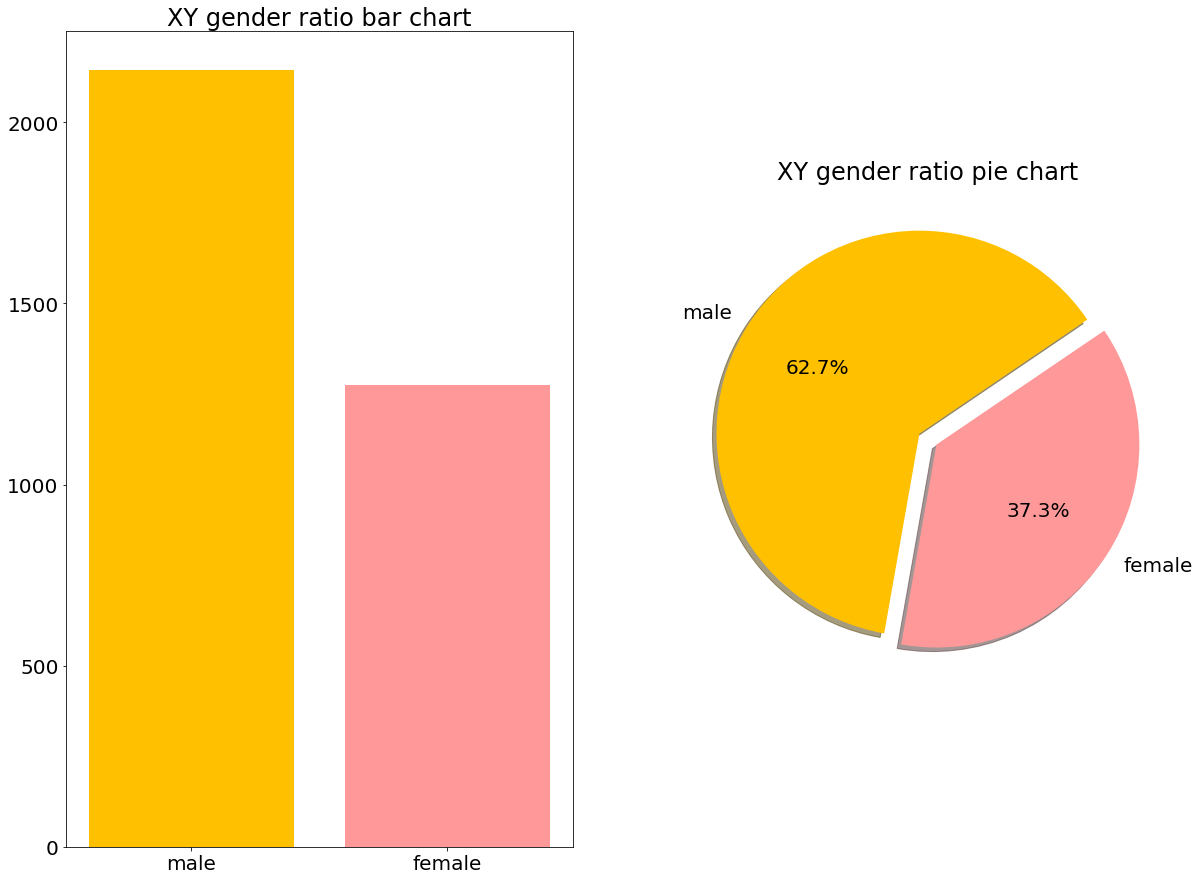

In [10]:
explode = [0.05, 0.05]
#colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
colors = ['#ffc000', '#ff9999']


fig, ax = plt.subplots(1,2,figsize=(20,15))


ax[0].bar(['male', 'female'],[sex_counts_yz[1], sex_counts_yz[2]], color = colors)
ax[1].pie([sex_counts_yz[1], sex_counts_yz[2]], labels=['male', 'female'], autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors) #textprops={'fontsize': 25}

ax[0].set_title('XY gender ratio bar chart')
ax[1].set_title('XY gender ratio pie chart')

#plt.scatter(['male', 'female'], [sex_counts[1], sex_counts[2]], marker= 'o', s=400, color= 'red', alpha=0.5)
plt.rcParams.update({'font.size': 20})

plt.show()

X, Y, Z세대 비율

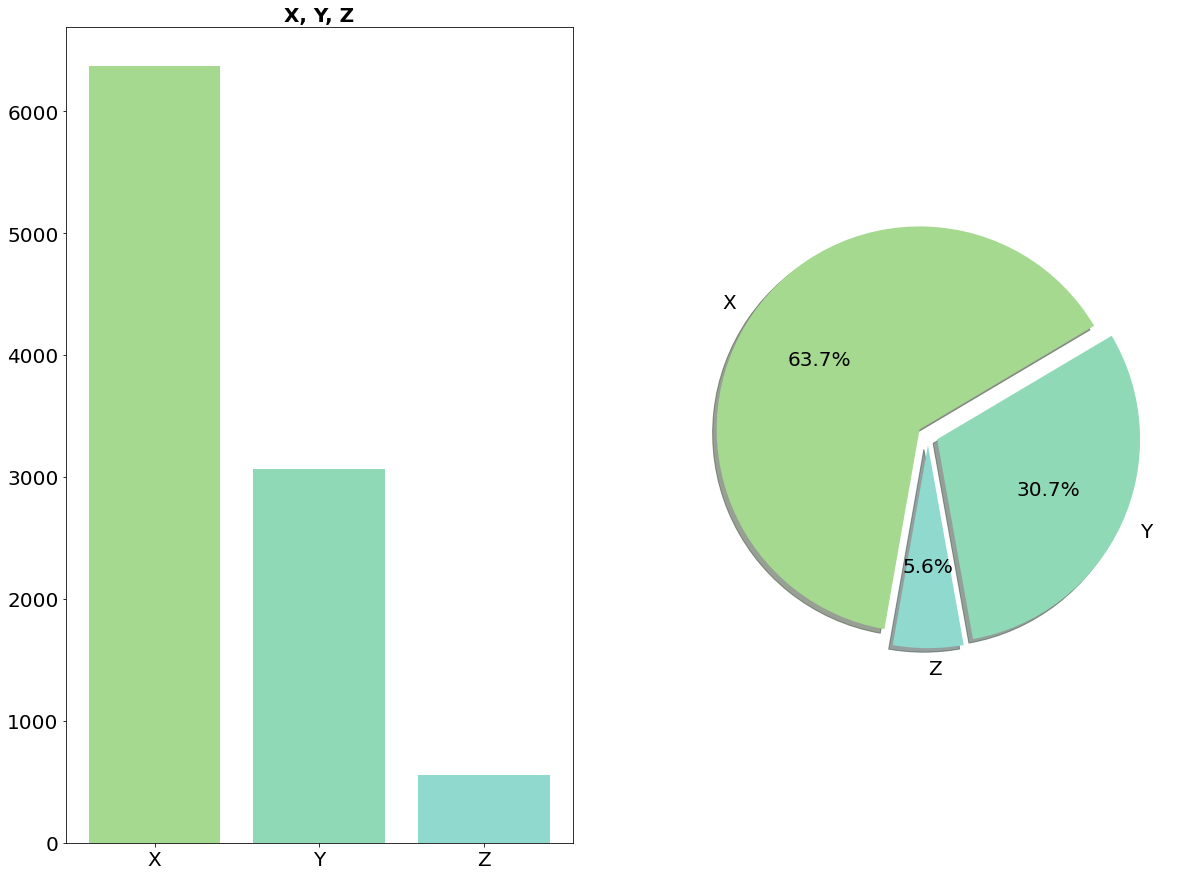

In [11]:
ages = cus['연령대'].value_counts()
ages.sort_index(inplace=True)

X = ages[40] + ages[45] + ages[50] + ages[55] + ages[60] + ages[65] + ages[70]
Y = ages[25] + ages[30] + ages[35]
Z = ages[0] + ages[20]

explode = [0.05, 0.05, 0.05]
#colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
ages_range = ['X', 'Y', 'Z']
colors = ['#a5d98f', '#8fd9b6', '#8fd9cf', '#8fc7d9', '#8fa0d9', '#a28fd9', '#b98fd9', '#c78fd9', '#d395d0', '#d395b8', '#d395a6', '#d39595']


fig, ax = plt.subplots(1, 2,figsize=(20,15))



ax[0].bar(ages_range,[X, Y, Z], color = colors)
ax[1].pie([X, Y, Z], labels = ages_range, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors) #textprops={'fontsize': 10}

plt.rcParams.update({'font.size': 20})

ax[0].tick_params(labelrotation=0)
ax[0].set_title('X, Y, Z',fontweight="bold", size=20)

plt.show()

Q. 가장 거래량이 많은 종목은?
Q. 삼성전자의 거래량은?
Q. 주문접수 시간대 - 체결 시간대
Q. 등급별 / 투자성향 별 거래량



In [27]:
Y / Z 주문매체 구분코드

SyntaxError: ignored

!! 1) act에서 계좌번호 - 고객번호 2)cus에서 고객번호 - 연령대 3) 연령대를 trd_oss에 갖다붙이기

계좌 개설월 - 첫 거래
-> 관심도 분석

성별

In [12]:
act_tmp = act.iloc[:,0:2]
cus_tmp = cus.iloc[:,0:3]

In [13]:
result = pd.merge(act_tmp, cus_tmp, on = '고객번호', how='right')

In [14]:
mydata = pd.merge(result, trd_oss, on = '계좌번호', how='right')

In [15]:
mydata

,계좌번호,고객번호,성별,연령대,주문날짜,주문순서,주문접수시간대,최종체결시간대,종목코드,매매구분코드,체결수량,체결가격,주문매체구분코드,거래통화코드,거래통화환율
0,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,1,30,20190102,1,14,14,CNE100001526,2,100.0,49.1500,3,CNY,162.55
1,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,1,30,20190214,1,11,11,CNE100001526,1,1000.0,52.7000,3,CNY,165.92
2,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,1,30,20190214,2,11,11,CNE100001526,1,1000.0,52.7000,3,CNY,165.92
3,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,1,30,20190214,3,11,11,CNE100001526,1,100.0,52.7000,3,CNY,165.92
4,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,1,30,20190214,4,11,11,CNE100001526,1,100.0,52.7000,3,CNY,165.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29296,d222b80b74e9d5990e136bbf0e682f34d41628139dcdfc...,6103c069e900259181efa244763c30c8df701cbe8e0e00...,1,35,20200630,2,23,23,US5500211090,2,3.0,308.1995,3,USD,1200.70
29297,d222b80b74e9d5990e136bbf0e682f34d41628139dcdfc...,6103c069e900259181efa244763c30c8df701cbe8e0e00...,1,35,20200630,3,23,23,US30303M1027,2,4.0,219.3000,3,USD,1200.70
29298,d222b80b74e9d5990e136bbf0e682f34d41628139dcdfc...,6103c069e900259181efa244763c30c8df701cbe8e0e00...,1,35,20200630,4,23,23,US6541061031,2,9.0,96.8000,3,USD,1200.70
29299,d222b80b74e9d5990e136bbf0e682f34d41628139dcdfc...,6103c069e900259181efa244763c30c8df701cbe8e0e00...,1,35,20200630,5,23,23,US88160R1014,2,1.0,1046.9200,3,USD,1200.70


In [38]:
'''X = ages[40] + ages[45] + ages[50] + ages[55] + ages[60] + ages[65] + ages[70]
Y = ages[25] + ages[30] + ages[35]
Z = ages[0] + ages[20]'''

'X = ages[40] + ages[45] + ages[50] + ages[55] + ages[60] + ages[65] + ages[70]\nY = ages[25] + ages[30] + ages[35]\nZ = ages[0] + ages[20]'

In [16]:
mydata['세대'] = ['Y' if mydata['연령대'][i] in [25, 30, 35] else ('Z' if mydata['연령대'][i] in [0, 20] else 'X') for i in range(len(mydata)) ]

In [17]:
mydata

,계좌번호,고객번호,성별,연령대,주문날짜,주문순서,주문접수시간대,최종체결시간대,종목코드,매매구분코드,체결수량,체결가격,주문매체구분코드,거래통화코드,거래통화환율,세대
0,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,1,30,20190102,1,14,14,CNE100001526,2,100.0,49.1500,3,CNY,162.55,Y
1,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,1,30,20190214,1,11,11,CNE100001526,1,1000.0,52.7000,3,CNY,165.92,Y
2,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,1,30,20190214,2,11,11,CNE100001526,1,1000.0,52.7000,3,CNY,165.92,Y
3,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,1,30,20190214,3,11,11,CNE100001526,1,100.0,52.7000,3,CNY,165.92,Y
4,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,1,30,20190214,4,11,11,CNE100001526,1,100.0,52.7000,3,CNY,165.92,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29296,d222b80b74e9d5990e136bbf0e682f34d41628139dcdfc...,6103c069e900259181efa244763c30c8df701cbe8e0e00...,1,35,20200630,2,23,23,US5500211090,2,3.0,308.1995,3,USD,1200.70,Y
29297,d222b80b74e9d5990e136bbf0e682f34d41628139dcdfc...,6103c069e900259181efa244763c30c8df701cbe8e0e00...,1,35,20200630,3,23,23,US30303M1027,2,4.0,219.3000,3,USD,1200.70,Y
29298,d222b80b74e9d5990e136bbf0e682f34d41628139dcdfc...,6103c069e900259181efa244763c30c8df701cbe8e0e00...,1,35,20200630,4,23,23,US6541061031,2,9.0,96.8000,3,USD,1200.70,Y
29299,d222b80b74e9d5990e136bbf0e682f34d41628139dcdfc...,6103c069e900259181efa244763c30c8df701cbe8e0e00...,1,35,20200630,5,23,23,US88160R1014,2,1.0,1046.9200,3,USD,1200.70,Y


In [18]:
sell = mydata[mydata['매매구분코드']==1]
buy = mydata[mydata['매매구분코드']==2]

In [19]:
print(sell[sell['종목코드']=='CNE100001526']['체결수량'].sum())
print(buy[buy['종목코드']=='CNE100001526']['체결수량'].sum())

17800.0
6500.0


In [20]:
YZ = mydata[mydata['세대'].isin(['Y','Z'])]

In [21]:
YZ['매매구분코드'].value_counts()

2    10844
1     3935
Name: 매매구분코드, dtype: int64

<h1><u> 주문매체 </u></h>

YZ세대 주문 매체

In [22]:
idx = sorted(trd_oss['주문매체구분코드'].value_counts().index)

In [23]:
ORR_MDI = ['BranchTerminal', 'Wired-Terminal', 'Wireless MTS', 'HTS' ]

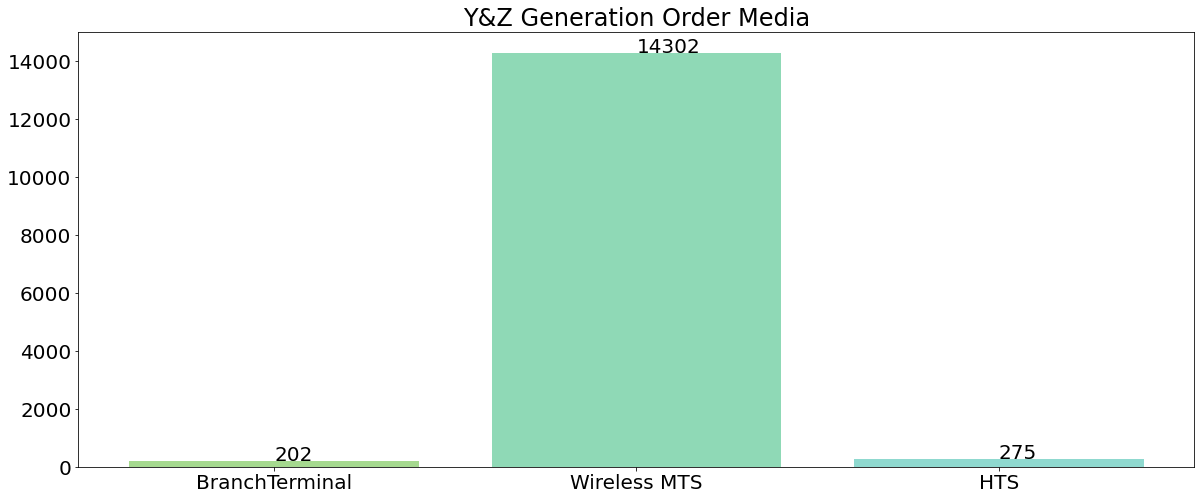

In [24]:
#-*-coding:utf-8-*-

plt.figure(figsize=(20,8))
plt.bar([ ORR_MDI[j-1] for j in idx], [YZ['주문매체구분코드'].value_counts()[i] for i in idx], color=['#a5d98f', '#8fd9b6', '#8fd9cf'])


'''x = [1,2,3,4,5]
y = [100,200,300,400,500]

import matplotlib.pyplot as plt

plt.bar(x,y)'''

for i in range(3):
  plt.text([ORR_MDI[j-1] for j in idx][i], [YZ['주문매체구분코드'].value_counts()[i] for i in idx][i], '{}'.format([YZ['주문매체구분코드'].value_counts()[i] for i in idx][i]) )
plt.title('Y&Z Generation Order Media')
plt.show()


YZ세대 성별별 주문매체

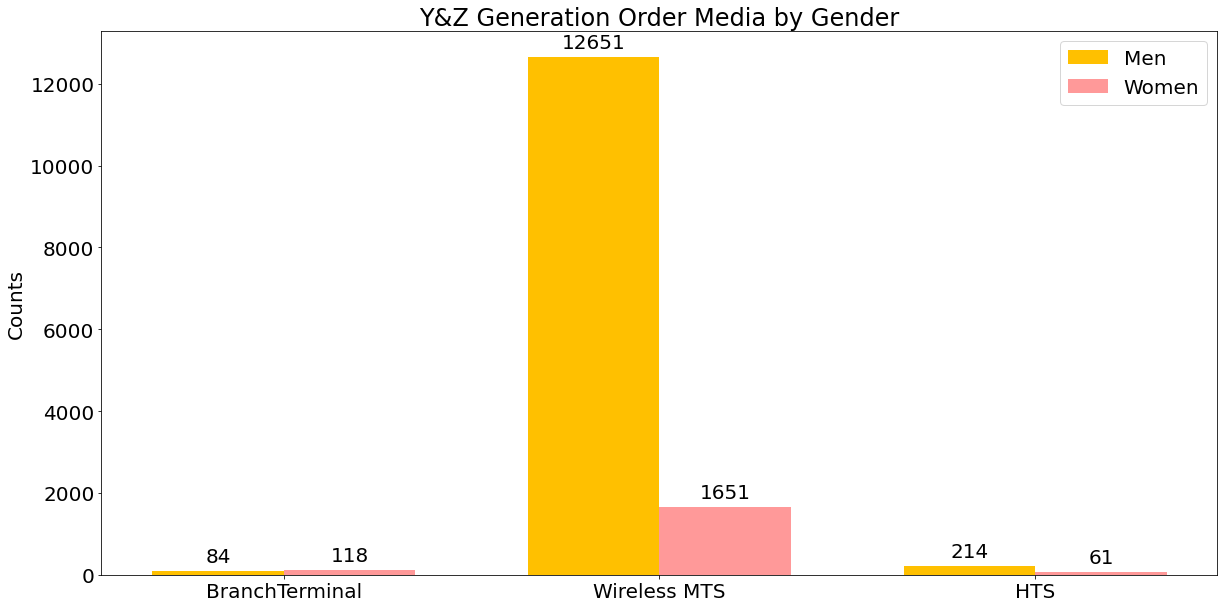

In [25]:
YZ_men = YZ[YZ['성별']==1]
YZ_women = YZ[YZ['성별']==2]

[YZ['주문매체구분코드'].value_counts()[i] for i in idx]

labels = [ ORR_MDI[j-1] for j in idx]
men_means = [YZ_men['주문매체구분코드'].value_counts()[i] for i in idx]
women_means = [YZ_women['주문매체구분코드'].value_counts()[i] for i in idx]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(x - width/2, men_means, width, color='#ffc000', label='Men')
rects2 = ax.bar(x + width/2, women_means, width, color='#ff9999', label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('Y&Z Generation Order Media by Gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)


#fig.tight_layout()

plt.show()

<h1><u> 주문접수시간대 </u></h>

따로

Text(0.5, 1.0, 'Order Time (Women)')

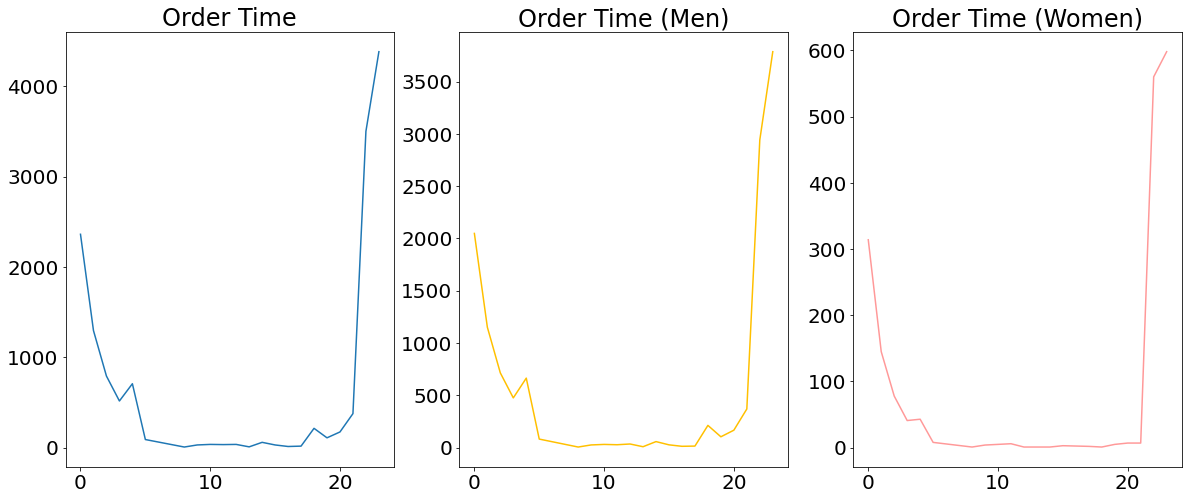

In [26]:
times = sorted(YZ['주문접수시간대'].value_counts().index)


YZ_men = YZ[YZ['성별']==1]
times_men = sorted(YZ_men['주문접수시간대'].value_counts().index)

YZ_women = YZ[YZ['성별']==2]
times_women = sorted(YZ_women['주문접수시간대'].value_counts().index)


fig, ax= plt.subplots(1,3, figsize=(20,8))


ax[0].plot( times, [YZ['주문접수시간대'].value_counts()[i] for i in times])
ax[0].set_title('Order Time')

ax[1].plot( times_men, [YZ_men['주문접수시간대'].value_counts()[i] for i in times_men], color='#ffc000')
ax[1].set_title('Order Time (Men)')

ax[2].plot( times_women, [YZ_women['주문접수시간대'].value_counts()[i] for i in times_women], color='#ff9999')
ax[2].set_title('Order Time (Women)')


한 번에

Text(0.5, 1.0, 'Order Time')

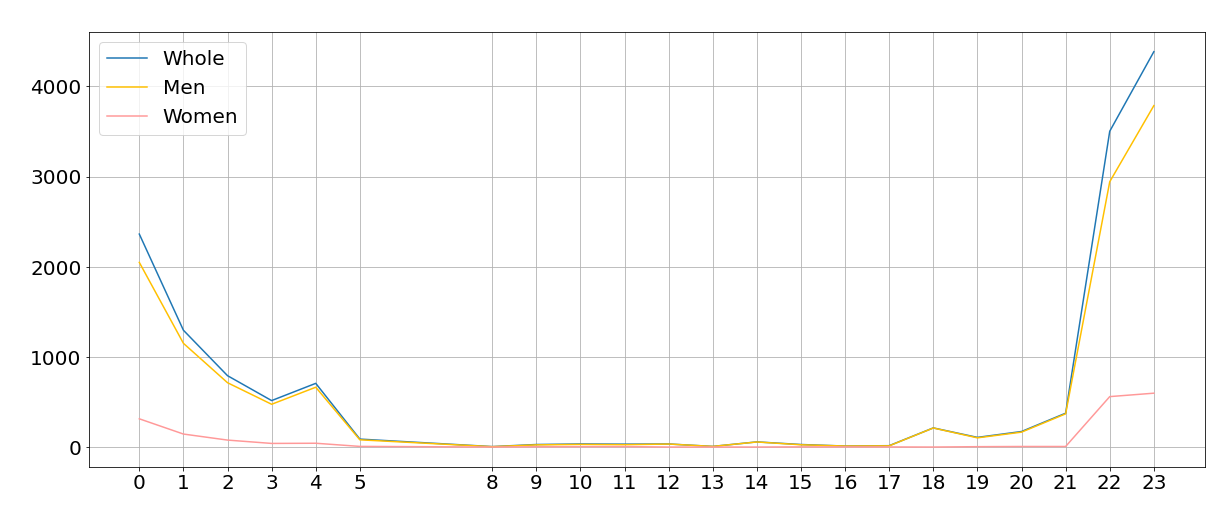

In [27]:
times = sorted(YZ['주문접수시간대'].value_counts().index)


YZ_men = YZ[YZ['성별']==1]
times_men = sorted(YZ_men['주문접수시간대'].value_counts().index)

YZ_women = YZ[YZ['성별']==2]
times_women = sorted(YZ_women['주문접수시간대'].value_counts().index)




plt.figure(figsize=(20,8))
plt.plot( times, [YZ['주문접수시간대'].value_counts()[i] for i in times])
plt.plot( times_men, [YZ_men['주문접수시간대'].value_counts()[i] for i in times_men], '#ffc000')
plt.plot( times_women, [YZ_women['주문접수시간대'].value_counts()[i] for i in times_women], '#ff9999')
plt.xlabel('Time', color='white')
plt.ylabel('Orders', color='white')
plt.xticks(times)

plt.grid(True)
plt.legend(['Whole', 'Men', 'Women'], loc='upper left')

plt.title('Order Time', color='white')

<h1><u> 계좌계설월 </u></h>
- 흥미도 구하면, 어따 쓰지? (수익에 관련시켜야 할 듯ㅁ)

In [67]:
YZ

,계좌번호,고객번호,성별,연령대,주문날짜,주문순서,주문접수시간대,최종체결시간대,종목코드,매매구분코드,체결수량,체결가격,주문매체구분코드,거래통화코드,거래통화환율,세대
0,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,1,30,20190102,1,14,14,CNE100001526,2,100.0,49.1500,3,CNY,162.55,Y
1,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,1,30,20190214,1,11,11,CNE100001526,1,1000.0,52.7000,3,CNY,165.92,Y
2,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,1,30,20190214,2,11,11,CNE100001526,1,1000.0,52.7000,3,CNY,165.92,Y
3,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,1,30,20190214,3,11,11,CNE100001526,1,100.0,52.7000,3,CNY,165.92,Y
4,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,1,30,20190214,4,11,11,CNE100001526,1,100.0,52.7000,3,CNY,165.92,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29296,d222b80b74e9d5990e136bbf0e682f34d41628139dcdfc...,6103c069e900259181efa244763c30c8df701cbe8e0e00...,1,35,20200630,2,23,23,US5500211090,2,3.0,308.1995,3,USD,1200.70,Y
29297,d222b80b74e9d5990e136bbf0e682f34d41628139dcdfc...,6103c069e900259181efa244763c30c8df701cbe8e0e00...,1,35,20200630,3,23,23,US30303M1027,2,4.0,219.3000,3,USD,1200.70,Y
29298,d222b80b74e9d5990e136bbf0e682f34d41628139dcdfc...,6103c069e900259181efa244763c30c8df701cbe8e0e00...,1,35,20200630,4,23,23,US6541061031,2,9.0,96.8000,3,USD,1200.70,Y
29299,d222b80b74e9d5990e136bbf0e682f34d41628139dcdfc...,6103c069e900259181efa244763c30c8df701cbe8e0e00...,1,35,20200630,5,23,23,US88160R1014,2,1.0,1046.9200,3,USD,1200.70,Y


<h1><u> 특정 주식에 대해서 (구매량 기준? iem 데이터 이용) </u></h>
- cus의 고객 등급 이용할 것, 성별

<h3>1)</h3> 등급별 수익 바 차트

In [68]:
#act num : 계좌 개수
#trd num : 매도 + 매수 합친 횟수
profit = pd.read_csv('/content/gdrive/Shareddrives/dacom_yz/cus_inf.csv')

profit['total_profit'] = profit['money_earn'] + profit['money_have']

In [69]:
profit

,cus_id,act_num,trd_num,money_earn,money_have,total_profit
0,1eec7e43dd6ea34d6be7a9484459e4db1a2da44c5bf311...,1.0,1.0,-13650000.0,258300.0,-13391700.0
1,7e50c268acce884b1a5b78c9b5645b517c4639413c6dc4...,1.0,1.0,-273000.0,1450000.0,1177000.0
2,b269192b83b41bdd494d9359c2b09bee8d2590fd1a9dab...,10.0,190.0,-299474250.0,4998410.0,-294475840.0
3,4f1f253d67e417b7b6fd84ad7cbb1673b26c4ef3e46001...,11.0,3.0,-14120300.0,6491827.0,-7628473.0
4,3812991826c4fa66bf78bc62595d173d86823170d58aa1...,2.0,244.0,-94669500.0,4146000.0,-90523500.0
...,...,...,...,...,...,...
4927,214df7b2a183c8c11b57289537897b7b456d38a222a5ef...,3.0,540.0,-17789055.0,0.0,-17789055.0
4928,4d4e0c6c802058822d61622ae2b3e39471fa2a87152035...,7.0,49.0,-10494575.0,0.0,-10494575.0
4929,347190a59df83bbf2d87888915b95cd5b5c52fb781a45e...,4.0,153.0,-454900.0,0.0,-454900.0
4930,3ae218361d32511eec17e92b139f048ec2613ff6d56ac9...,2.0,4.0,-5878958.0,0.0,-5878958.0


In [78]:
cus_eng = pd.read_csv('/content/gdrive/Shareddrives/dacom_yz/2_cus_info.csv')

yz20 = cus_eng['cus_age'] == 20
yz25 = cus_eng['cus_age'] == 25
yz30 = cus_eng['cus_age'] == 30
yz35 = cus_eng['cus_age'] == 35

cus_yz_eng = cus_eng.loc[cus_eng['cus_age'].index[yz20 | yz25 | yz30 | yz35]]

In [79]:
cus_eng = pd.read_csv('/content/gdrive/Shareddrives/dacom_yz/2_cus_info.csv')
cus_eng

,cus_id,sex_dit_cd,cus_age,zip_ctp_cd,tco_cus_grd_cd,ivs_icn_cd
0,1eec7e43dd6ea34d6be7a9484459e4db1a2da44c5bf311...,2,20,29,04,-
1,7e50c268acce884b1a5b78c9b5645b517c4639413c6dc4...,2,0,41,09,-
2,36d3cd293c4b02a00103fa1ba33ffbee176173a55df75b...,1,70,27,03,-
3,96b6dea03dc71d9ddb1462e06fdba23def1ddc838debf7...,1,70,41,09,-
4,034eb5406bd021a9a88f046e33765efd5b3cd190b39538...,1,70,11,05,-
...,...,...,...,...,...,...
9995,214df7b2a183c8c11b57289537897b7b456d38a222a5ef...,2,35,48,04,03
9996,4d4e0c6c802058822d61622ae2b3e39471fa2a87152035...,2,35,41,09,-
9997,347190a59df83bbf2d87888915b95cd5b5c52fb781a45e...,2,35,11,09,-
9998,3ae218361d32511eec17e92b139f048ec2613ff6d56ac9...,1,35,31,05,-


In [80]:
profit_yz = pd.merge(cus_yz_eng, profit, on = 'cus_id', how='inner')

In [81]:
profit_yz

,cus_id,sex_dit_cd,cus_age,zip_ctp_cd,tco_cus_grd_cd,ivs_icn_cd,act_num,trd_num,money_earn,money_have,total_profit
0,1eec7e43dd6ea34d6be7a9484459e4db1a2da44c5bf311...,2,20,29,04,-,1.0,1.0,-13650000.0,258300.0,-13391700.0
1,a2e2aef34dadc59d14b62017832a5bd568b7062039eef2...,1,35,11,03,05,2.0,233.0,-237194260.0,33595220.0,-203599040.0
2,7d8317e7cbd1ab353c113627212bead7d03692343bf5ad...,1,35,27,09,04,3.0,186.0,-3228980.0,33206680.0,29977700.0
3,d132895a102736340c59369b3ca3019c3efb1354b12ca5...,2,35,43,03,05,3.0,30.0,-39043500.0,8297151.0,-30746349.0
4,468e183cbe273ac23da9a1b779dcf3da7c681c6909129f...,1,35,47,04,-,3.0,9.0,-60391500.0,1129160.0,-59262340.0
...,...,...,...,...,...,...,...,...,...,...,...
3413,214df7b2a183c8c11b57289537897b7b456d38a222a5ef...,2,35,48,04,03,3.0,540.0,-17789055.0,0.0,-17789055.0
3414,4d4e0c6c802058822d61622ae2b3e39471fa2a87152035...,2,35,41,09,-,7.0,49.0,-10494575.0,0.0,-10494575.0
3415,347190a59df83bbf2d87888915b95cd5b5c52fb781a45e...,2,35,11,09,-,4.0,153.0,-454900.0,0.0,-454900.0
3416,3ae218361d32511eec17e92b139f048ec2613ff6d56ac9...,1,35,31,05,-,2.0,4.0,-5878958.0,0.0,-5878958.0


In [82]:
tmp = profit_yz['total_profit']
tmp[tmp>0]

2        29977700.0
6        43294830.0
7        24999098.0
11        4659270.0
12       59047362.0
           ...     
3403    119423230.0
3405    200727720.0
3407       123900.0
3408      4461555.0
3412         2335.0
Name: total_profit, Length: 528, dtype: float64

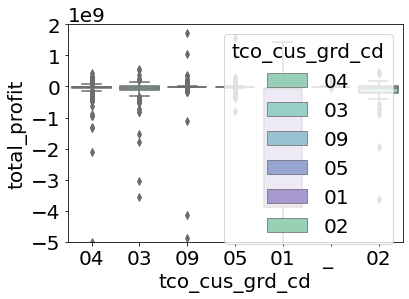

In [83]:
palette = [ '#8fd9b6', '#8fd9cf', '#8fc7d9', '#8fa0d9', '#a28fd9', '#b98fd9']

#ax = sns.barplot(x="tco_cus_grd_cd", y="total_profit", hue="tco_cus_grd_cd", data=profit_yz, palette = palette, dodge=False, edgecolor='k', capsize = 0.1)
ax = sns.boxplot(x="tco_cus_grd_cd", y="total_profit", hue="tco_cus_grd_cd", data=profit_yz, palette = palette, dodge=False)

ax.set(ylim=(-5000000000, 2000000000))
sns.set(rc={'figure.figsize':(110.7,8.27)})


등급별 인기 종목 pie chart
연령대별 인기 종목 pie chart

성별별 등급 분포

In [ ]:
labels = [ ORR_MDI[j-1] for j in idx]
men_means = [YZ_men['주문매체구분코드'].value_counts()[i] for i in idx]
women_means = [YZ_women['주문매체구분코드'].value_counts()[i] for i in idx]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(x - width/2, men_means, width, color='#ffc000', label='Men')
rects2 = ax.bar(x + width/2, women_means, width, color='#ff9999', label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('Y&Z Generation Order Media by Gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)


#fig.tight_layout()

plt.show()

<h1><u> 지도 히트맵 </u></h>

In [ ]:
pip install -U plotly

  Using cached https://files.pythonhosted.org/packages/c9/09/315462259ab7b60a3d4b7159233ed700733c87d889755bdc00a9fb46d692/plotly-4.14.1-py2.py3-none-any.whl
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


한국 지리정보 json 데이터 : https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2013/json/skorea_provinces_geo_simple.json

미국

In [28]:

url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'
state_unemployment = f'{url}/US_Unemployment_Oct2012.csv'
state_data = pd.read_csv(state_unemployment)

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_data,
    columns=['State', 'Unemployment'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Unemployment Rate (%)'
).add_to(m)

folium.LayerControl().add_to(m)

m

NameError: ignored

In [ ]:
state_data

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1
5,CO,7.7
6,CT,8.4
7,DE,7.1
8,FL,8.2
9,GA,8.8


In [ ]:
cus_yz_eng

,cus_id,sex_dit_cd,cus_age,zip_ctp_cd,tco_cus_grd_cd,ivs_icn_cd
0,1eec7e43dd6ea34d6be7a9484459e4db1a2da44c5bf311...,2,20,29,04,-
1261,a2e2aef34dadc59d14b62017832a5bd568b7062039eef2...,1,35,11,03,05
1262,7d8317e7cbd1ab353c113627212bead7d03692343bf5ad...,1,35,27,09,04
1263,d132895a102736340c59369b3ca3019c3efb1354b12ca5...,2,35,43,03,05
1264,468e183cbe273ac23da9a1b779dcf3da7c681c6909129f...,1,35,47,04,-
...,...,...,...,...,...,...
9995,214df7b2a183c8c11b57289537897b7b456d38a222a5ef...,2,35,48,04,03
9996,4d4e0c6c802058822d61622ae2b3e39471fa2a87152035...,2,35,41,09,-
9997,347190a59df83bbf2d87888915b95cd5b5c52fb781a45e...,2,35,11,09,-
9998,3ae218361d32511eec17e92b139f048ec2613ff6d56ac9...,1,35,31,05,-


한국 (지역별 고객수)

In [ ]:

'''41: 경기 / 11: 서울 / 48: 경남 / 26: 부산 / 27: 대구

47: 경북 / 28: 인천 / 44: 충남 / 46: 전남 / 30: 대전

29: 광주 / 43: 충북 / 45: 전북 / 42: 강원 / 31: 울산


50: 제주 / 36: 세종 / -: 해당 없음'''

'41: 경기 / 11: 서울 / 48: 경남 / 26: 부산 / 27: 대구\n\n47: 경북 / 28: 인천 / 44: 충남 / 46: 전남 / 30: 대전\n\n29: 광주 / 43: 충북 / 45: 전북 / 42: 강원 / 31: 울산\n\n\n50: 제주 / 36: 세종 / -: 해당 없음'

In [84]:
names = ['서울특별시', '경기도', '경상남도', '부산광역시','인천광역시','대구광역시', '경상북도', '충청남도', '대전광역시', '충청북도', '광주광역시', '전라북도', '전라남도', '강원도', '울산광역시', '세종특별자치시', '제주특별자치도', '?']
customers = cus_yz_eng['zip_ctp_cd'].value_counts()

In [85]:
tmp = pd.DataFrame({"name" : names, "customers" : customers})

In [86]:
tmp

,name,customers
11,서울특별시,877
41,경기도,869
48,경상남도,214
26,부산광역시,171
28,인천광역시,166
27,대구광역시,151
47,경상북도,134
44,충청남도,133
30,대전광역시,110
43,충청북도,101


한국 지도 viz : https://github.com/southkorea/southkorea-maps/blob/master/kostat/2013/json/skorea_provinces_geo_simple.json

한국 지도 json 데이터 : https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2013/json/skorea_provinces_geo_simple.json

한국 최종

In [88]:
tmp1 = tmp.reset_index(drop=True)
tmp1

,name,customers
0,서울특별시,877
1,경기도,869
2,경상남도,214
3,부산광역시,171
4,인천광역시,166
5,대구광역시,151
6,경상북도,134
7,충청남도,133
8,대전광역시,110
9,충청북도,101


In [91]:
import json
import folium
import urllib.request

In [92]:
state_geo = "https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2013/json/skorea_provinces_geo_simple.json"

#url = "https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2013/json/skorea_provinces_geo_simple.json"
#text_data = urllib.request.urlopen(url).read().decode('utf-8')
#state_geo = json.loads(text_data)

#json_data = json.loads(data)

state_data = tmp1 #tmp

m = folium.Map(location=[36.5, 128], zoom_start=7)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_data,
    #data=state_data,
    columns=('name', 'customers'),
    #columns=['name', 'customers'],
    key_on='feature.properties.name',
    #key_on='feature.properties.names',
    #fill_color='RdPu',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='The Number of Customers'
).add_to(m)

folium.LayerControl().add_to(m)

m

In [ ]:
state_geo

'https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2013/json/skorea_provinces_geo_simple.json'

다른 버전

In [ ]:
import os
from mapboxgl.viz import *
from mapboxgl.utils import *
from mapboxgl.utils import create_color_stops

# 환경변수에서 자신의 mapbox token 을 가져옵니다.
#token = os.getenv('MAPBOX_ACCESS_TOKEN')

token = 'pk.eyJ1IjoianVueWVvbmdhaG4wMzE5IiwiYSI6ImNrajY0MHI2djBoOTQzM3FnaGk2dTA0emsifQ.spSQ5Bz-EdJeUlFy-IEHFQ'

# 서울시 중심부의 경도, 위도 입니다. 
center = [126.986, 37.565]

# 시각화 할 값에 따른 색상의 범주를 지정해줍니다.

color_breaks = [0, 10000, 20000, 30000, 40000, 50000]
color_stops = create_color_stops(color_breaks, colors='BuPu')

# color_stops 에는 다음과 같은 값이 들어갑니다.
# color_stops = [
#     [0, 'rgb(237,248,251)'],
#     [10000, 'rgb(191,211,230)'],
#     [20000, 'rgb(158,188,218)'],
#     [30000, 'rgb(140,150,198)'],
#     [40000, 'rgb(136,86,167)'],
#     [50000, 'rgb(129,15,124)']
# ]

# ChoroplethViz 를 그립니다.
viz = ChoroplethViz(
    access_token=token,
    data=state_geo,
    color_property=state_data['customers'],
    color_stops=color_stops,
    center=center,
    zoom=10)

# 맵을 출력합니다.
viz.show()

In [ ]:
token

'pk.eyJ1IjoianVueWVvbmdhaG4wMzE5IiwiYSI6ImNrajY0MHI2djBoOTQzM3FnaGk2dTA0emsifQ.spSQ5Bz-EdJeUlFy-IEHFQ'

cheplotheviz 다른 방식

In [ ]:
url = "https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2013/json/skorea_provinces_geo_simple.json"
text_data = urllib.request.urlopen(url).read().decode('utf-8')
data = json.loads(text_data)


In [ ]:
tmp1

,name,customers
0,서울특별시,877
1,경기도,869
2,경상남도,214
3,부산광역시,171
4,인천광역시,166
5,대구광역시,151
6,경상북도,134
7,충청남도,133
8,대전광역시,110
9,충청북도,101


In [ ]:
for i in range(len(tmp1)) : 
    for j in range(len(tmp1)) : 
        if data['features'][i]['properties']["name"] == tmp1["name"][j] : 
            data['features'][i]['properties']["people"] = int(tmp1["customers"][j])

IndexError: ignored

고객수 탑3 지역 등급 분포 piechart

41: 경기 / 11: 서울 / 48: 경남 / 26: 부산 / 27: 대구

47: 경북 / 28: 인천 / 44: 충남 / 46: 전남 / 30: 대전

29: 광주 / 43: 충북 / 45: 전북 / 42: 강원 / 31: 울산


50: 제주 / 36: 세종 / -: 해당 없음

In [118]:
Seoul_p = cus_yz[cus_yz['주소(시도)']=='11']['고객등급'].value_counts()
Gyeonggi_p = cus_yz[cus_yz['주소(시도)']=='41']['고객등급'].value_counts()
Gyeongsang_p = cus_yz[cus_yz['주소(시도)']=='48']['고객등급'].value_counts()

In [119]:
rank_indices = ['01', '02', '03', '04', '05', '09', '_ ']

Seoul_list = []
Gyeonggi_list = []
Gyeongsang_list = []

for i in rank_indices:
  try:
    Seoul_list.append(Seoul_p[i])
  except KeyError:
    Seoul_list.append(0)

for i in rank_indices:
  try:
    Gyeonggi_list.append(Gyeonggi_p[i])
  except KeyError:
    Gyeonggi_list.append(0)

for i in rank_indices:
  try:
    Gyeongsang_list.append(Gyeongsang_p[i])
  except KeyError:
    Gyeongsang_list.append(0)

In [121]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

rank_labels = ["탑클래스", "골드", "로얄", "그린", "블루", "등급 없음", "해당사항 없음" ]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=rank_labels, values=Seoul_list, name="Seoul"),
              1, 1)
fig.add_trace(go.Pie(labels=rank_labels, values=Gyeonggi_list, name="Gyeonggi"),
              1, 2)
fig.add_trace(go.Pie(labels=rank_labels, values=Gyeongsang_list, name="Gyeongsang"),
              1, 3)


# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="고객수 TOP 3 지역별 고객등급 분포",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='서울특별시', x=0.11, y=0.5, font_size=20, showarrow=False),
                 dict(text='경기도', x=0.5, y=0.5, font_size=20, showarrow=False),
                 dict(text='경상남도', x=0.88, y=0.5, font_size=20, showarrow=False)])
fig.show()

성별별 투자 성향

01: 안정형 / 02: 안정추구형 / 03: 위험중립형 
04: 적극투자형 / 05: 공격투자형 09: 전문투자자형 / 00:정보제공미동의 
_: 해당 사항 없음

In [122]:
cus_yz_men = cus_yz[cus_yz['성별']==1]
cus_yz_women = cus_yz[cus_yz['성별']==2]

In [123]:
inv_type_men = cus_yz_men['고객투자성향'].value_counts()
inv_type_women = cus_yz_women['고객투자성향'].value_counts()

In [125]:
type_indices = ['01', '02', '03', '04', '05', '09', '00' '-']

men_list = []
women_list = []

for i in type_indices:
  try:
    men_list.append(inv_type_men[i])
  except KeyError:
    men_list.append(0)

for i in type_indices:
  try:
    women_list.append(inv_type_women[i])
  except KeyError:
    women_list.append(0)

In [126]:
type_labels = ["안정형", "안정추구형", "위험중립형", "적극투자형", "공격투자형", "전문투자형", "정보제공미동의", "해당사항 없음" ]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=type_labels, values=men_list, name="Men"),
              1, 1)
fig.add_trace(go.Pie(labels=type_labels, values=women_list, name="Women"),
              1, 2)


# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="성별별 투자 성향",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='남성 투자자', x=0.19, y=0.5, font_size=20, showarrow=False),
                 dict(text='여성 투자자', x=0.81, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [130]:
type_labels[0:6]

['안정형', '안정추구형', '위험중립형', '적극투자형', '공격투자형', '전문투자형']

- 좀 더 이쁘게?

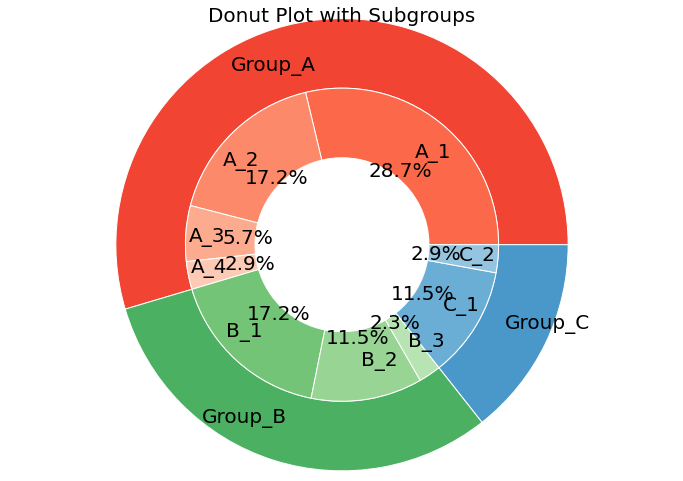

In [117]:
plt.rcParams['figure.figsize'] = [12, 8]

 
group_names = ["안정형", "안정추구형", "위험중립형", "적극투자형", "공격투자형", "전문투자형"]

group_sizes = [95, 54, 25]


subgroup_names = ['남', '여', '남', '여', '남', '여', '남', '여', '남', '여']

subgroup_sizes = [50, 30, 10, 5, 30, 20, 4, 20, 5]



# colors

a, b, c = [plt.cm.Reds, plt.cm.Greens, plt.cm.Blues]



# width

width_num = 0.4

 





# Outside Ring

fig, ax = plt.subplots()

ax.axis('equal')

pie_outside, _ = ax.pie(group_sizes, 

                        radius=1.3, 

                        labels=group_names, 

                        labeldistance=0.8,

                        colors=[a(0.6), b(0.6), c(0.6)])

plt.setp(pie_outside, 

         width=width_num, 

         edgecolor='white')



# Inside Ring

pie_inside, plt_labels, junk = ax.pie(subgroup_sizes, 

           radius=(1.3 - width_num), 

           labels=subgroup_names, 

           labeldistance=0.75, 

           autopct='%1.1f%%', 

           colors=[a(0.5), a(0.4), a(0.3), a(0.2), 

                   b(0.5), b(0.4), b(0.3), 

                   c(0.5), c(0.4)])

plt.setp(pie_inside, 

         width=width_num, 

         edgecolor='white')

plt.title('Donut Plot with Subgroups', fontsize=20)

plt.show()



stacked bar chart

In [ ]:
data = [[2000, 2000, 2000, 2001, 2001, 2001, 2002, 2002, 2002],
        ['Jan', 'Feb', 'Mar', 'Jan', 'Feb', 'Mar', 'Jan', 'Feb', 'Mar'],
        [1, 2, 3, 4, 5, 6, 7, 8, 9]]

rows = zip(data[0], data[1], data[2])

headers = ['Year', 'Month', 'Value']

df = pd.DataFrame(list(rows), columns=headers)

df

pivot_df = df.pivot(index='Year', columns='Month', values='Value')
pivot_df = pivot_df[['Jan','Feb','Mar']].copy()
pivot_df

import matplotlib.pyplot as plt
%matplotlib inline

# Stacked Bar Chart
pivot_df.plot.bar(stacked=True, figsize=(10,7))

3차원?

지역별 이익이나
등급별 손익 파이차트